2024-06-03 13:24:56.357479: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 13:24:56.387323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:24:56.862149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


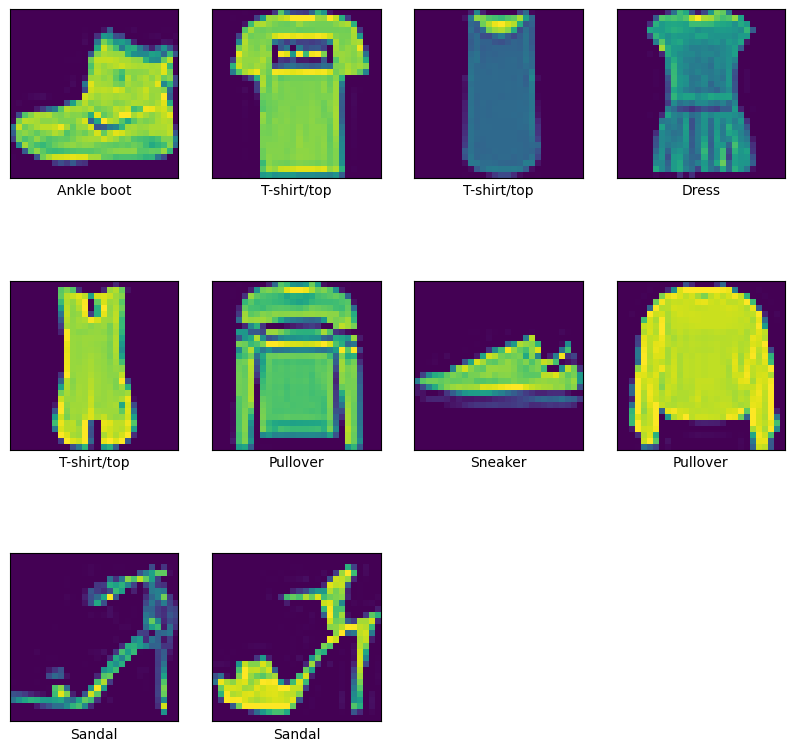

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Model load: MNIST / Fashion MNIST Dataset
fashion_mnist= tf.keras.datasets.fashion_mnist
# or
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
# normalized iamges
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))    


In [2]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'],
)
model.fit(f_image_train, f_label_train, epochs=10, batch_size=10)
model.summary()
model.save('fashion_mnist.h5')

Epoch 1/10


2024-06-03 13:25:02.107240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-03 13:25:02.114118: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7782 - loss: 0.6122
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8620 - loss: 0.3699
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8753 - loss: 0.3408
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8870 - loss: 0.3036
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8900 - loss: 0.2933
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8990 - loss: 0.2712
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9012 - loss: 0.2660
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9016 - loss: 0.2608
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9058 - loss: 0.2487
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9094 - loss: 0.2446


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [7]:
num =10
predict = model.predict(f_image_test[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 2 1 1 6 1 4 6 5 7]
